# Exploratory Data Analysis Starter

## 1. Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [15]:
info = []
scores = []
for _ in range(int(input())): # first input the total number of people
    name = input()          # then input name
    score = float(input())   # input grades
    
#smin = sorted(set(scores))[1]  # get the second lowest grade


3
a
1
b
2
c
4


---

## 2. Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('BCG_client_data.csv')
price_df = pd.read_csv("BCG_price_data.csv")

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


with the client data, we have a mix of numeric and categorical data,which we will need to transform before modelling later.

In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


with the price data, it is purely numerica data, but we can see a lot of zeros.

---

## 3. Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [14]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [15]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


we can see that all of the **datetime** related columns are not currently in datetime format.We will need to convert these later.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [5]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


the key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [6]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


overall the price data looks good.

---

## 4.Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [7]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

### 4.1 Churn

In [8]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_total

,Companies
churn,
0,13187
1,1419


In [12]:
churn_percentage.transpose()

churn,0,1
Companies,90.284814,9.715186


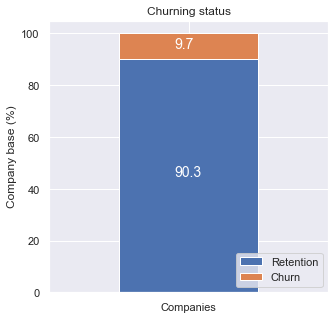

In [13]:
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

about 10% of the companies have churned

### 4.2 Sales channel

In [21]:
channel = client_df[['id','channel_sales','churn']]
channel = channel.groupby(['channel_sales','churn'])['id'].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [24]:
channel_churn = channel.div(channel.sum(axis=1),axis=0)*100
channel_churn = channel_churn.sort_values(by=[1],ascending=False)

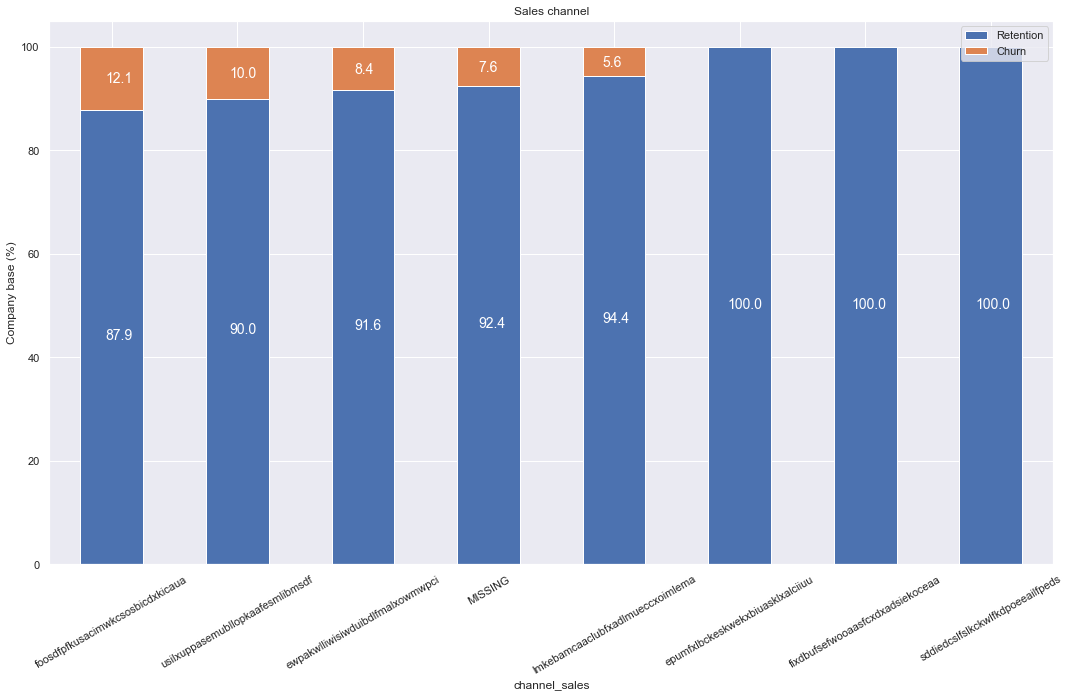

In [25]:
plot_stacked_bars(channel_churn,'Sales channel',rot_=30)

Interestingly, the churning customers are distributed over 5 different values for channel_sales. Missing has a churn rate of 7.6%. Missing indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### 4.3 Consumption

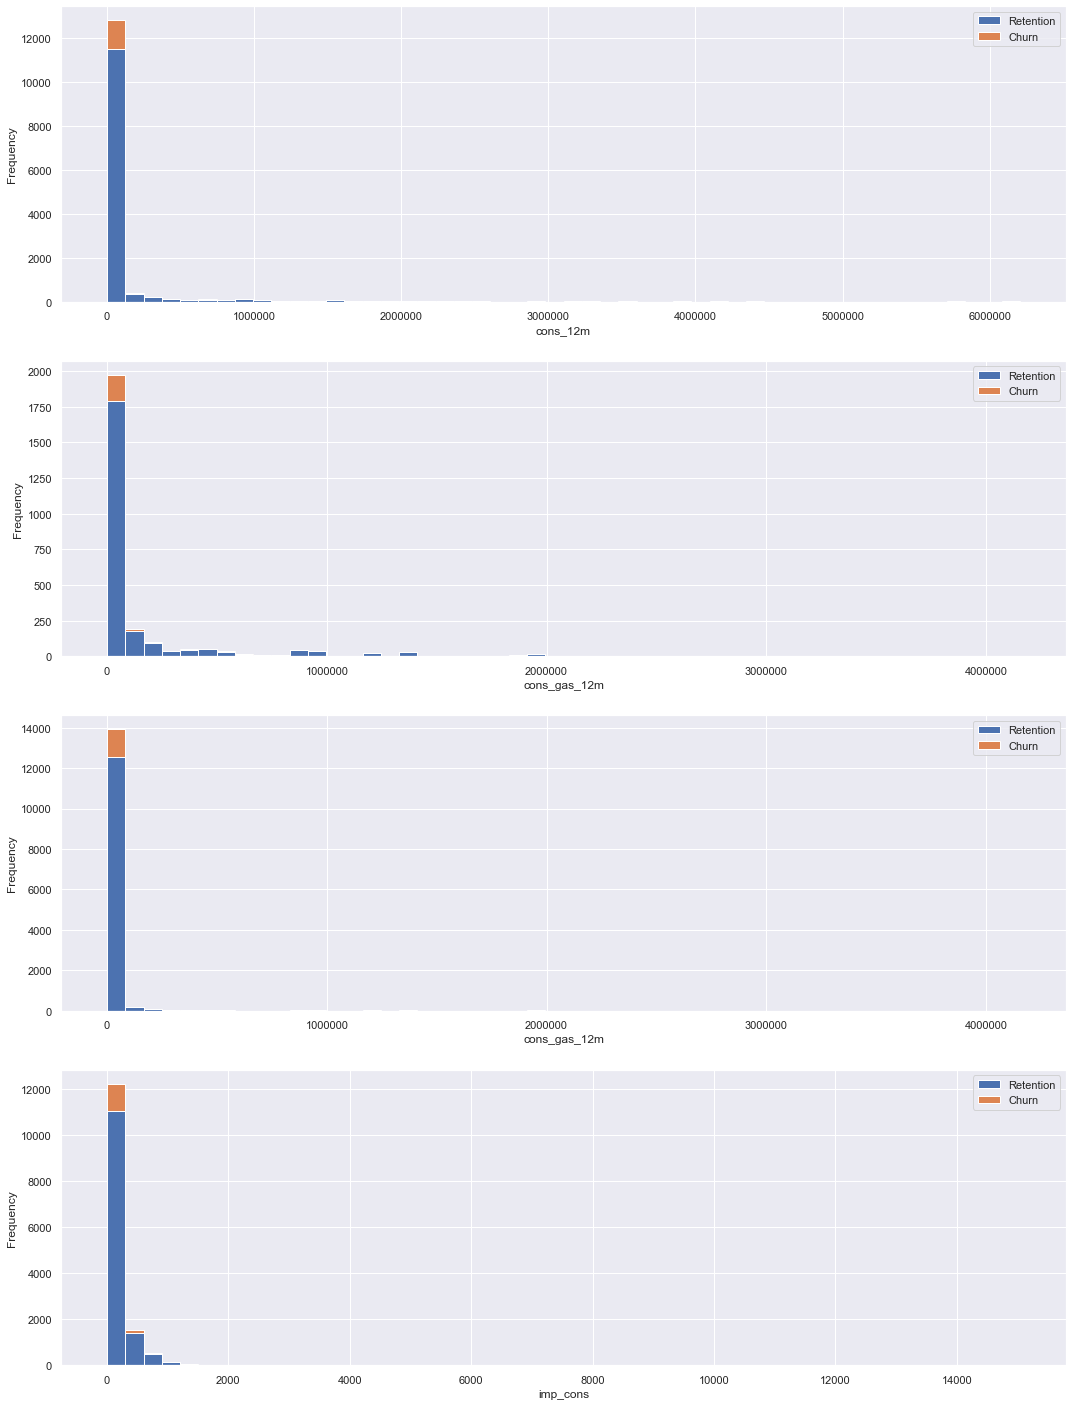

In [26]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_gas_12m', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

The plots are positively skewed and have many outliers. Use boxplot to standarize the displaying the distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

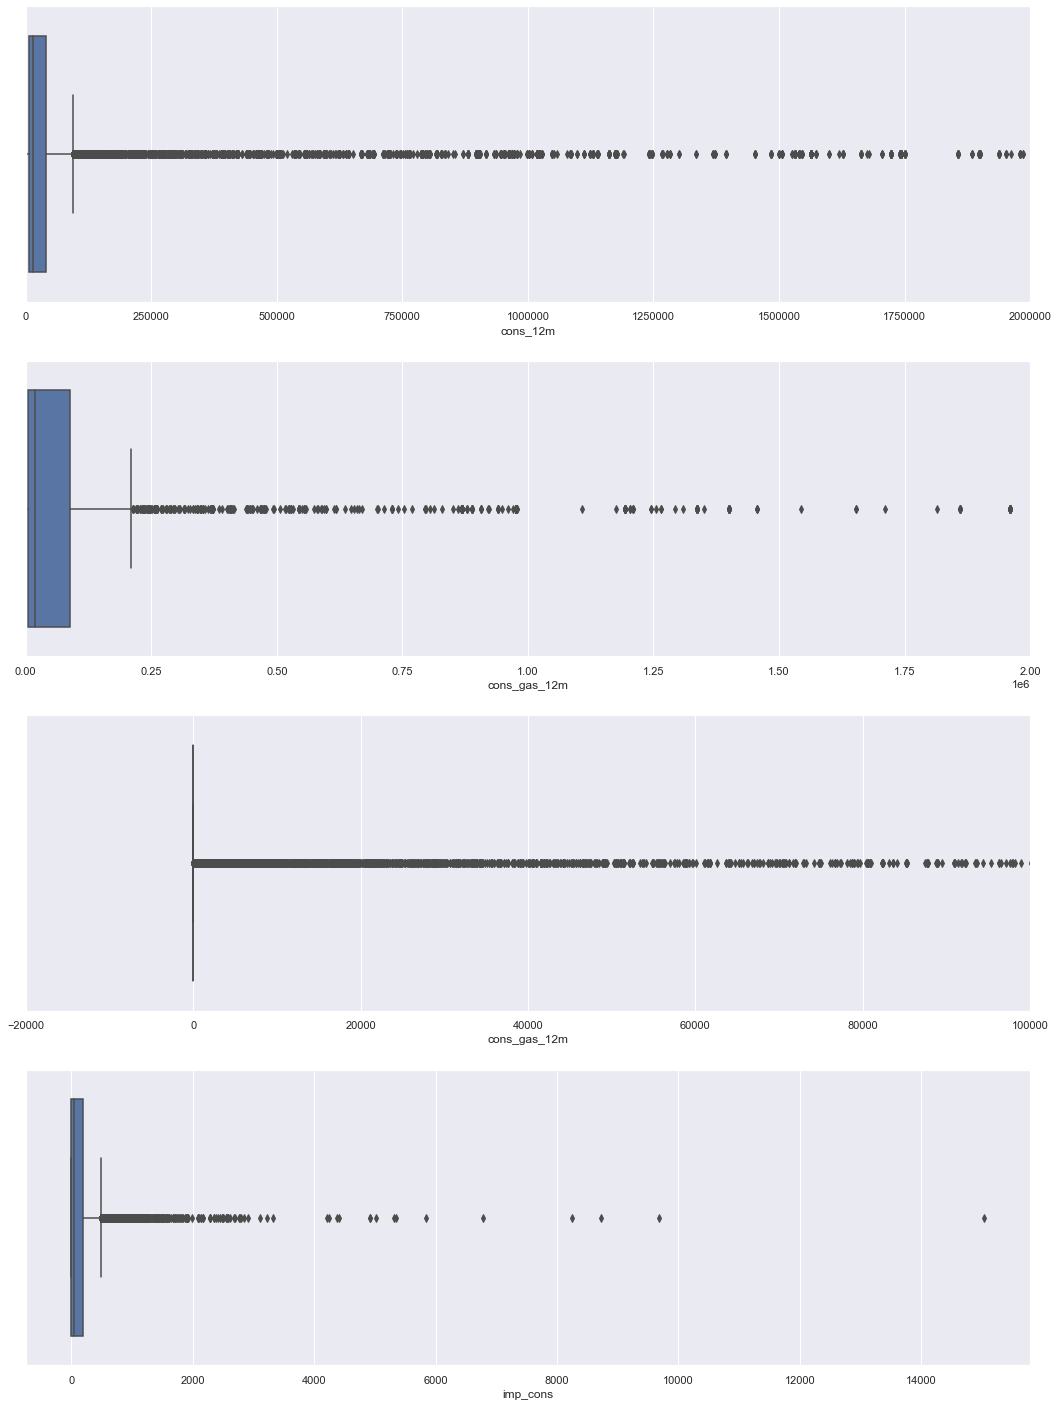

In [34]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

sns.boxplot(consumption['cons_12m'],ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(consumption['cons_gas_12m'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
    axs[0].set_xlim(0,2000000)
    axs[1].set_xlim(0,2000000)
    axs[2].set_xlim(-20000,100000)
    plt.show()

we will deal with skewness and outliers during feature engineering 

### 4.4 Forcast

In [37]:
forecast = client_df[['id','forecast_cons_12m',
                    'forecast_cons_year',"forecast_discount_energy",
                      "forecast_meter_rent_12m","forecast_price_energy_off_peak",
                      "forecast_price_energy_peak","forecast_price_pow_off_peak",
                      "churn"
]]

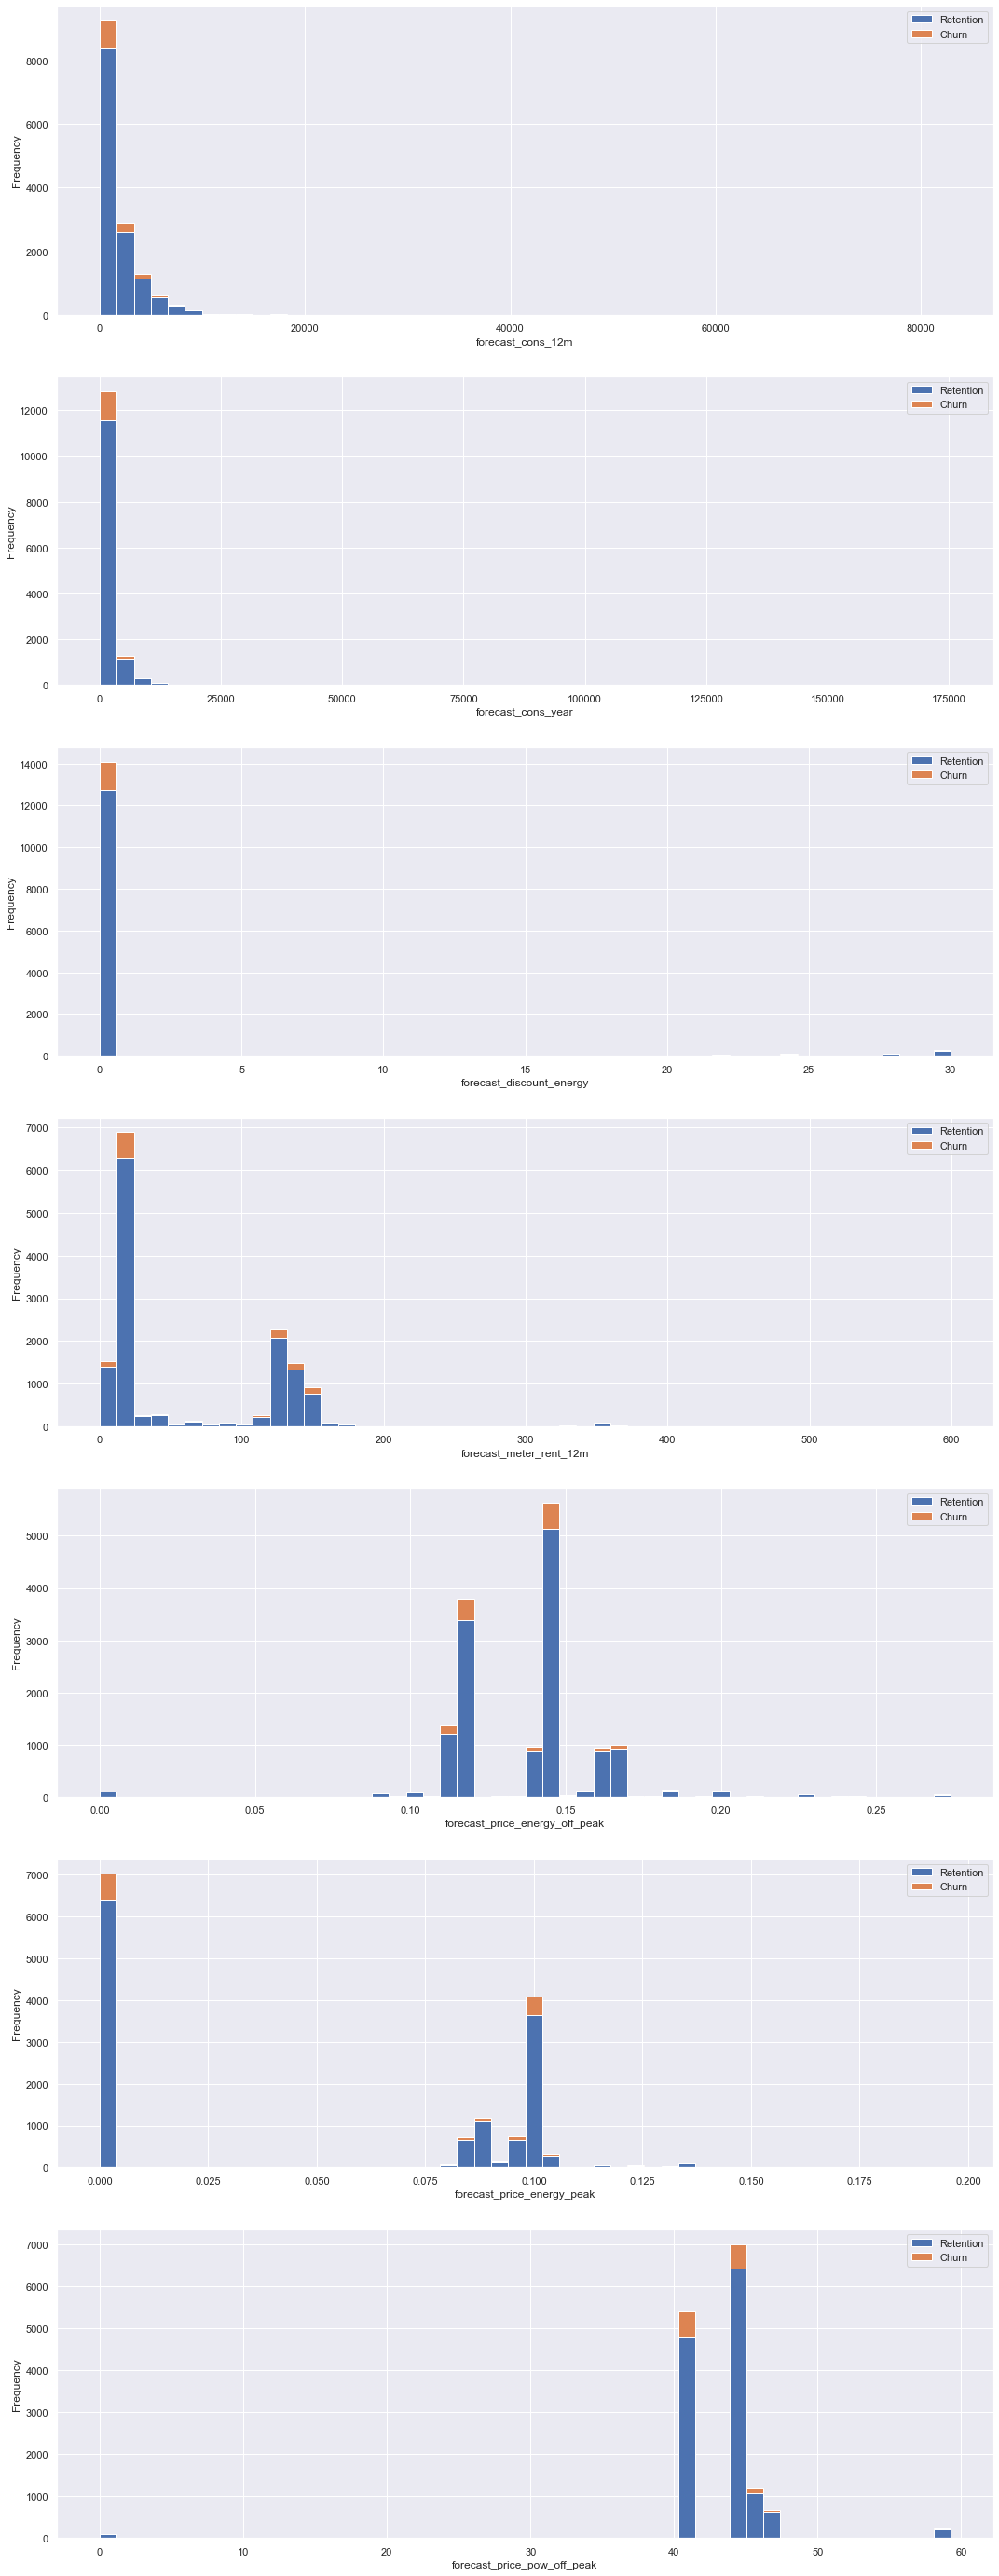

In [38]:
fig,axs = plt.subplots(nrows=7, figsize=(18,50))

# plot histogram
plot_distribution(client_df,"forecast_cons_12m",axs[0])
plot_distribution(client_df,"forecast_cons_year",axs[1])
plot_distribution(client_df,"forecast_discount_energy",axs[2])
plot_distribution(client_df,"forecast_meter_rent_12m",axs[3])
plot_distribution(client_df,"forecast_price_energy_off_peak",axs[4])
plot_distribution(client_df,"forecast_price_energy_peak",axs[5])
plot_distribution(client_df,"forecast_price_pow_off_peak",axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively
skewed, creating a very long tail for the higher values. We will make some transformations during
the next exercise to correct for this skewness.


### 4.5 Contract type

In [39]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)


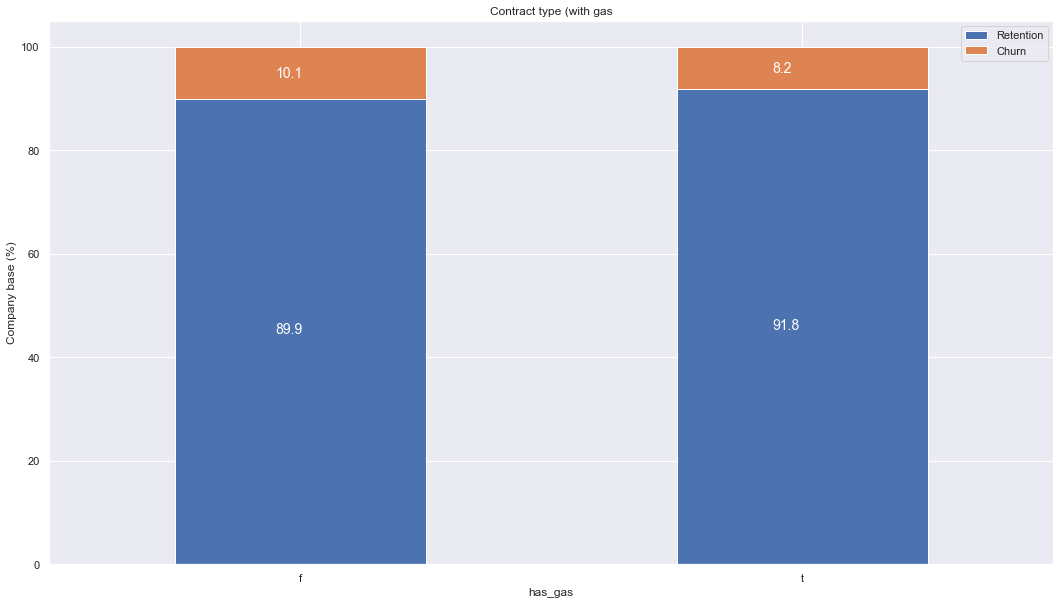

In [40]:
plot_stacked_bars(contract_percentage,'Contract type (with gas')

### 4.6 Margins

In [41]:
margin = client_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='net_margin'>

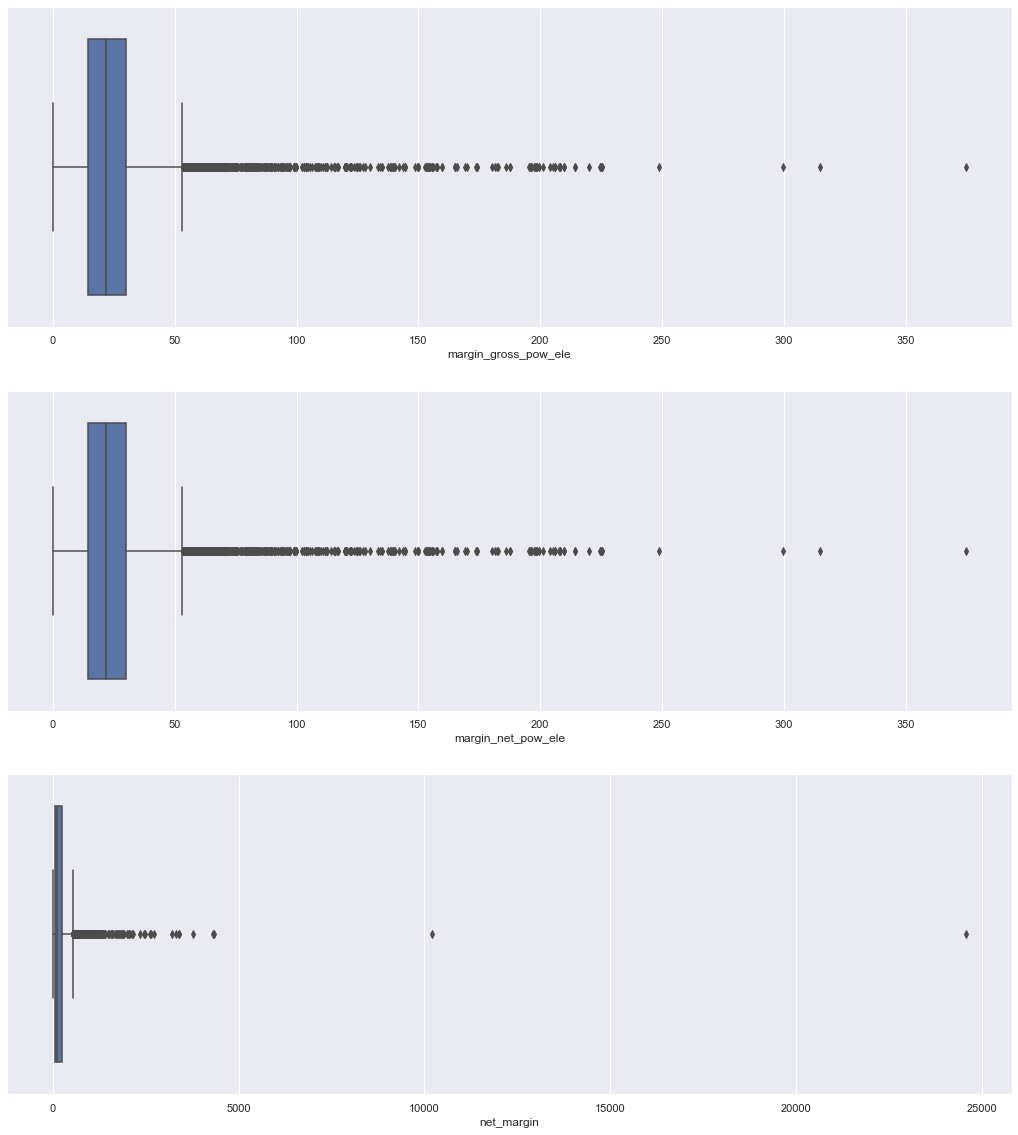

In [43]:
fig,axs = plt.subplots(nrows=3,figsize=(18,20))

sns.boxplot(margin['margin_gross_pow_ele'],ax=axs[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axs[1])
sns.boxplot(margin['net_margin'],ax=axs[2])

we can see some outliers here as well which we will deal with in the next excercise

### 4.7 subscirbed power

In [44]:
power = client_df[['id','pow_max','churn']]

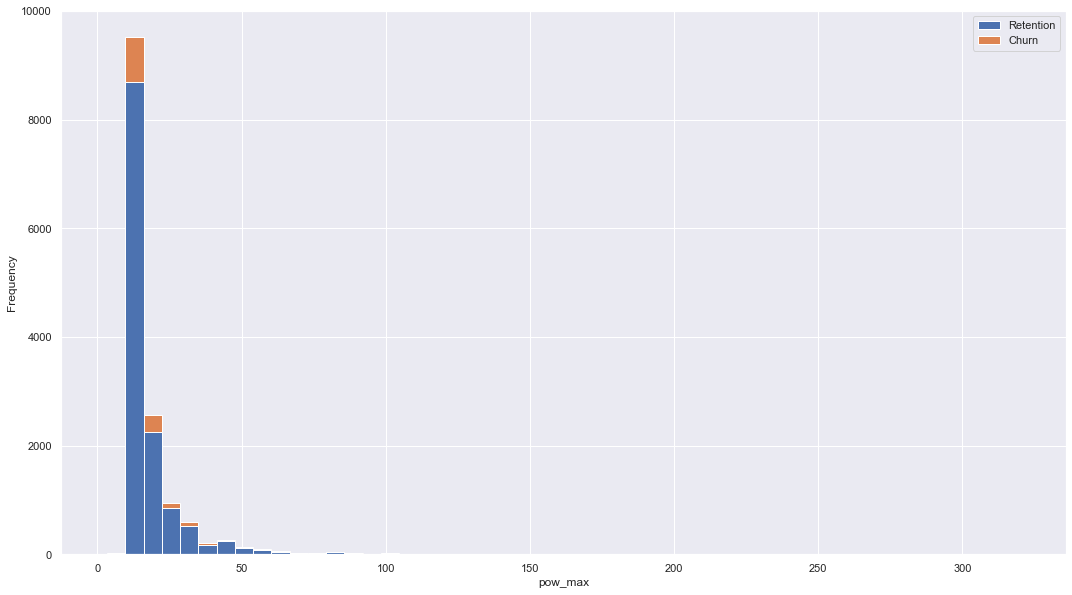

In [45]:
fig, axs = plt.subplots(nrows=1,figsize=(18,10))
plot_distribution(power,'pow_max',axs)

### 4.8 Other columns

In [51]:
others = client_df[['id','nb_prod_act','num_years_antig','origin_up','churn']]
products = others.groupby(['nb_prod_act','churn'])['id'].count().unstack(level=1).fillna(0)
products_percentage = (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
products_percentage

churn,0,1
nb_prod_act,,
4,90.000000,10.000000
1,90.018371,9.981629
3,90.057361,9.942639
5,90.322581,9.677419
2,91.492843,8.507157
6,100.000000,0.000000
8,100.000000,0.000000
9,100.000000,0.000000
10,100.000000,0.000000


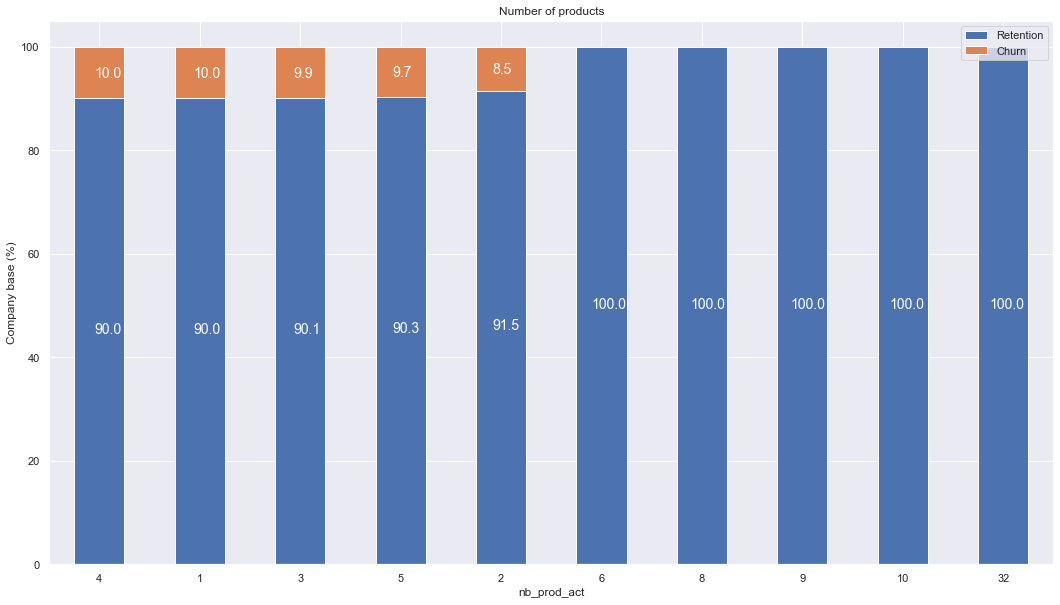

In [52]:
plot_stacked_bars(products_percentage, "Number of products")

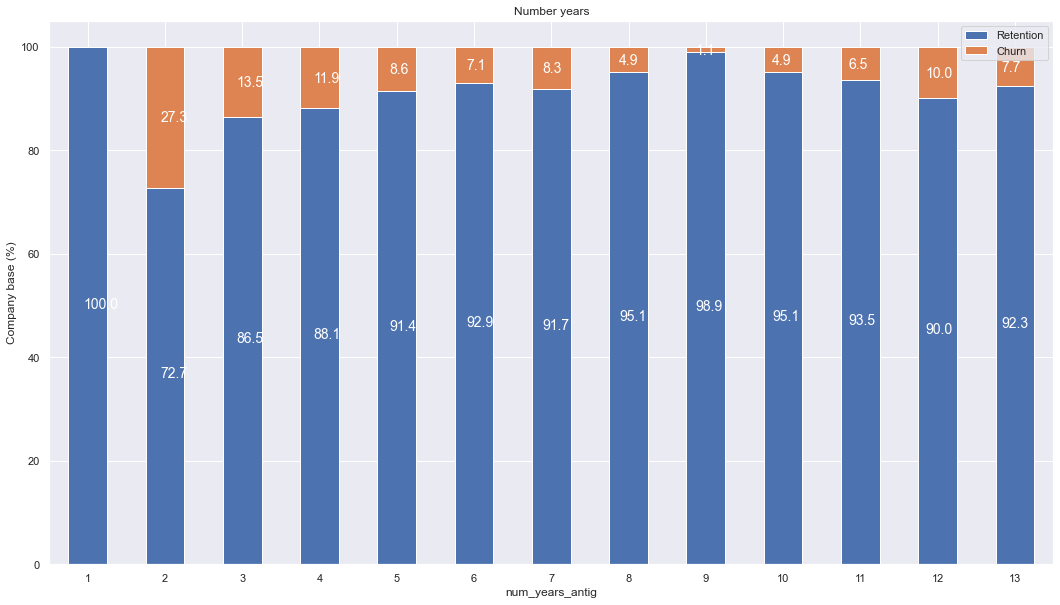

In [53]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

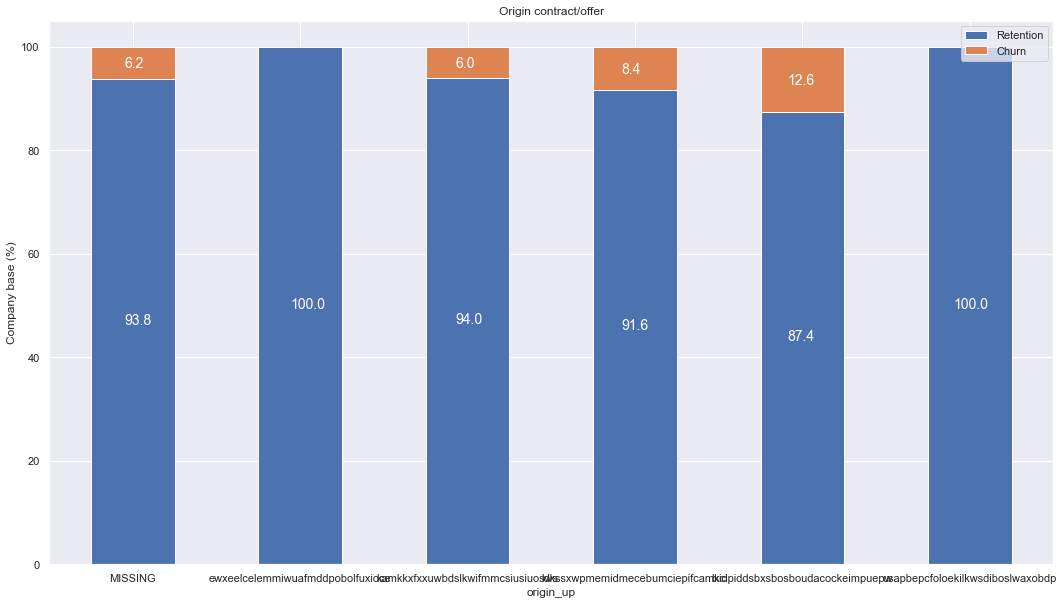

In [54]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## 5. Hypothesis investigation

Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

> Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [60]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(index=str,
    columns={
        "price_p1_var": "mean_year_price_p1_var",
        "price_p2_var": "mean_year_price_p2_var",
        "price_p3_var": "mean_year_price_p3_var",
        "price_p1_fix": "mean_year_price_p1_fix",
        "price_p2_fix": "mean_year_price_p2_fix",
        "price_p3_fix": "mean_year_price_p3_fix"
    }
)

mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_p1_var": "mean_6m_price_p1_var",
        "price_p2_var": "mean_6m_price_p2_var",
        "price_p3_var": "mean_6m_price_p3_var",
        "price_p1_fix": "mean_6m_price_p1_fix",
        "price_p2_fix": "mean_6m_price_p2_fix",
        "price_p3_fix": "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_p1_var": "mean_3m_price_p1_var",
        "price_p2_var": "mean_3m_price_p2_var",
        "price_p3_var": "mean_3m_price_p3_var",
        "price_p1_fix": "mean_3m_price_p1_fix",
        "price_p2_fix": "mean_3m_price_p2_fix",
        "price_p3_fix": "mean_3m_price_p3_fix"
    }
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

KeyError: 'mean_year_price_p1_var'